- 데이터 확인

In [1]:
import pandas as pd
import pymysql

In [2]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [3]:
cur_1=conn1.cursor()

In [4]:
sql="SELECT * FROM usertbl;"

In [5]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [6]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7
0,BBK,바비킴,1973,서울,010,0000000,176,2013-05-05
1,EJW,은지원,1972,경북,011,8888888,174,2014-03-03
2,JKW,조관우,1965,경기,018,9999999,172,2010-10-10
3,JYP,조용필,1950,경기,011,4444444,166,2009-04-04
4,KBS,김범수,1979,경남,011,2222222,173,2012-04-04
5,KKH,김경호,1971,전남,019,3333333,177,2007-07-07
6,LJB,임재범,1963,서울,016,6666666,182,2009-09-09
7,LSG,이승기,1987,서울,011,1111111,182,2008-08-08
8,SSK,성시경,1979,서울,None,None,186,2013-12-12
9,YJS,윤종신,1969,경남,None,None,170,2005-05-05


- 인덱스 설정

In [7]:
import pandas as pd
import pymysql

In [8]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [9]:
cur_1=conn1.cursor()

In [10]:
sql="SHOW INDEX FROM usertbl;"

In [11]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [12]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,usertbl,0,PRIMARY,1,userID,A,2,None,None,,BTREE,,,YES,None


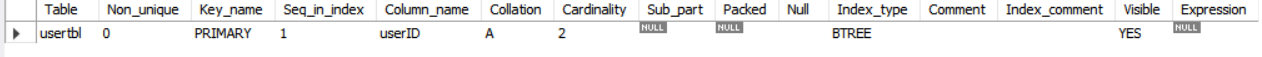

- 크기 확인

In [13]:
import pandas as pd
import pymysql

In [14]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [15]:
cur_1=conn1.cursor()

In [16]:
sql="SHOW TABLE STATUS LIKE 'usertbl';"

In [17]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [18]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,usertbl,InnoDB,10,Dynamic,10,1638,16384,0,0,0,None,2023-01-15 00:10:48,2023-01-15 00:10:48,None,utf8mb4_0900_ai_ci,None,,


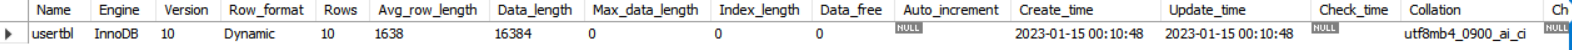

- 보조 인덱스 생성

In [19]:
import pandas as pd
import pymysql

In [20]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [21]:
cur_1=conn1.cursor()

In [22]:
sql="SHOW INDEX FROM usertbl;"

In [23]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [24]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,usertbl,0,PRIMARY,1,userID,A,2,None,None,,BTREE,,,YES,None
1,usertbl,1,idx_usertbl_addr,1,addr,A,5,None,None,,BTREE,,,YES,None


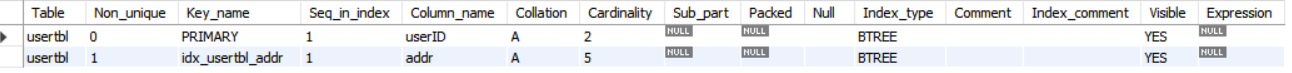

유니크한 인덱스가 아님

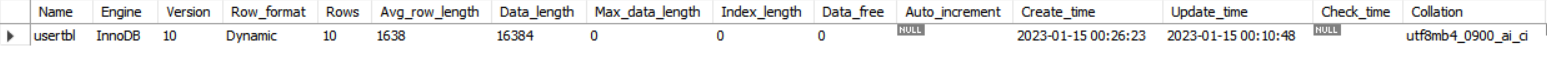

인덱스 크기가 계속 0 이 나옴

- ANALYZE TABLE문을 사용

In [25]:
import pandas as pd
import pymysql

In [26]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [27]:
cur_1=conn1.cursor()

In [28]:
sql="SHOW TABLE STATUS LIKE 'usertbl';"

In [29]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [30]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,usertbl,InnoDB,10,Dynamic,10,1638,16384,0,16384,0,None,2023-01-15 00:26:23,2023-01-15 00:10:48,None,utf8mb4_0900_ai_ci,None,,


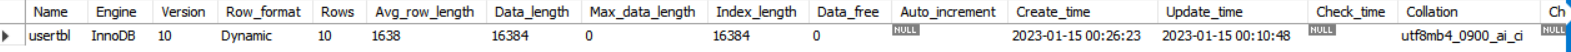

- 출생년도 보조 인덱스는 중복이 있어서 에러가 남

- 이름에 보조 인덱스 생성

In [31]:
import pandas as pd
import pymysql

In [32]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [33]:
cur_1=conn1.cursor()

In [34]:
sql="SHOW INDEX FROM usertbl;"

In [35]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [36]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,usertbl,0,PRIMARY,1,userID,A,10,None,None,,BTREE,,,YES,None
1,usertbl,0,idx_usertbl_name,1,name,A,10,None,None,,BTREE,,,YES,None
2,usertbl,1,idx_usertbl_addr,1,addr,A,5,None,None,,BTREE,,,YES,None


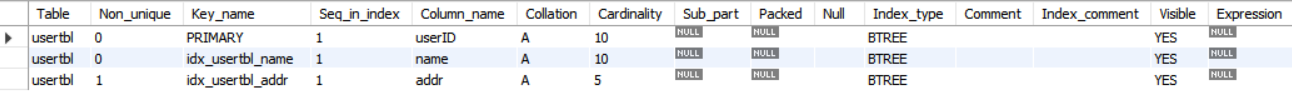

고유 보조 인덱스를 생성해서 중복된 값은 입력할 수 없음

- 이름과 출생년도 열을 조합해서 인덱스를 생성

In [37]:
import pandas as pd
import pymysql

In [38]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [39]:
cur_1=conn1.cursor()

In [40]:
sql="SHOW INDEX FROM usertbl;"

In [41]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [42]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,usertbl,0,PRIMARY,1,userID,A,10,None,None,,BTREE,,,YES,None
1,usertbl,1,idx_usertbl_addr,1,addr,A,5,None,None,,BTREE,,,YES,None
2,usertbl,1,idx_usertbl_name_birthYear,1,name,A,10,None,None,,BTREE,,,YES,None
3,usertbl,1,idx_usertbl_name_birthYear,2,birthYear,A,10,None,None,,BTREE,,,YES,None


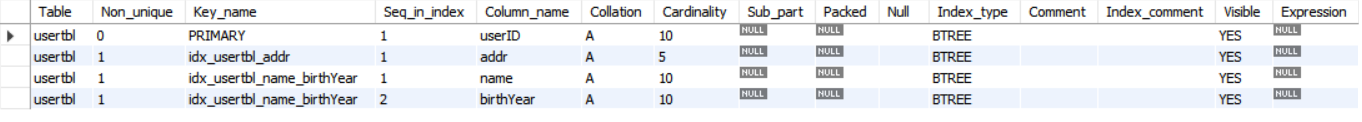

In [43]:
import pandas as pd
import pymysql

In [44]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='sqldb',charset='utf8')

In [45]:
cur_1=conn1.cursor()

In [46]:
sql="SELECT * FROM usertbl WHERE name = '윤종신' and birthYear = '1969';;"

In [47]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [48]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7
0,YJS,윤종신,1969,경남,None,None,170,2005-05-05


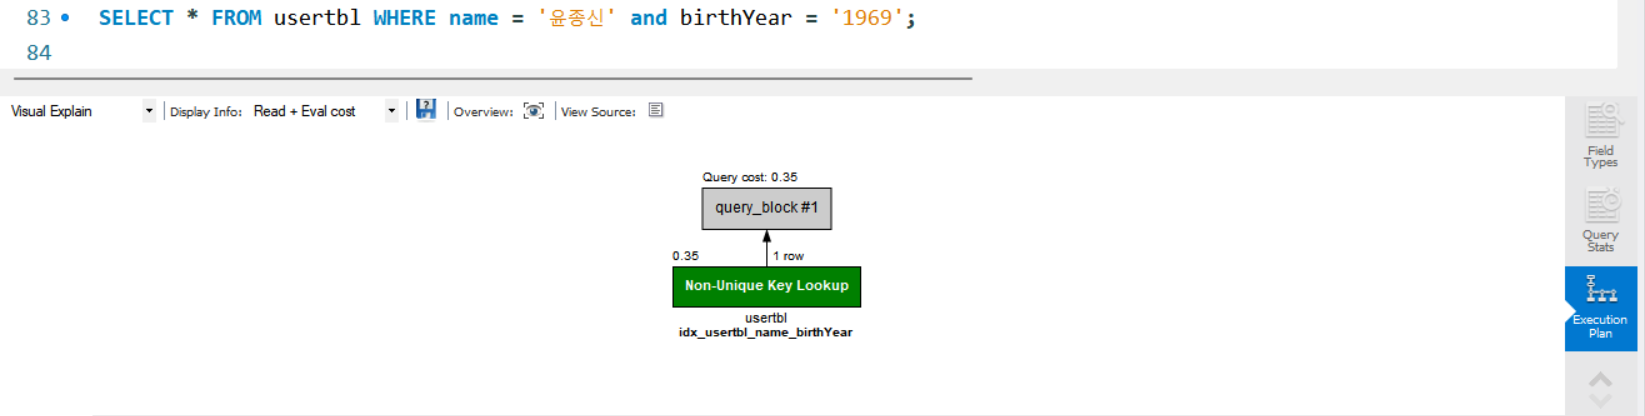

데이터 종류가 적은 경우 인덱스를 사용하지 않는 것이 좋음

- 인덱스 삭제

이렇게 보조 인덱스를 삭제해도 좋지만  
`DROP INDEX idx_usertbl_addr ON usertbl;  
DROP INDEX idx_usertbl_name_birthYear ON usertbl;  
DROP INDEX idx_usertbl_mobile1 ON usertbl;`

이렇게 삭제해도 괜찮음  
`ALTER TABLE usertbl DROP INDEX idx_usertbl_addr;  
ALTER TABLE usertbl DROP INDEX idx_usertbl_name_birthYear;  
ALTER TABLE usertbl DROP INDEX idx_usertbl_mobile1;`

- primary key로 설정되어 있으면 ALTER TABLE을 사용해야 함

- 외래 키를 삭제하고 기본 키를 삭제